# Ford GoBike System Data Exploration
## by Khaled Ahmed

## Preliminary Wrangling

> This data set includes information about individual rides made in a bike-sharing system covering the greater San Francisco Bay area..

In [113]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

In [114]:
data = pd.read_csv('201902-fordgobike-tripdata.csv')

## Assessing Data

In [115]:
data.head()

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip
0,52185,2019-02-28 17:32:10.1450,2019-03-01 08:01:55.9750,21.0,Montgomery St BART Station (Market St at 2nd St),37.789625,-122.400811,13.0,Commercial St at Montgomery St,37.794231,-122.402923,4902,Customer,1984.0,Male,No
1,42521,2019-02-28 18:53:21.7890,2019-03-01 06:42:03.0560,23.0,The Embarcadero at Steuart St,37.791464,-122.391034,81.0,Berry St at 4th St,37.775880,-122.393170,2535,Customer,NaN,NaN,No
2,61854,2019-02-28 12:13:13.2180,2019-03-01 05:24:08.1460,86.0,Market St at Dolores St,37.769305,-122.426826,3.0,Powell St BART Station (Market St at 4th St),37.786375,-122.404904,5905,Customer,1972.0,Male,No
3,36490,2019-02-28 17:54:26.0100,2019-03-01 04:02:36.8420,375.0,Grove St at Masonic Ave,37.774836,-122.446546,70.0,Central Ave at Fell St,37.773311,-122.444293,6638,Subscriber,1989.0,Other,No
4,1585,2019-02-28 23:54:18.5490,2019-03-01 00:20:44.0740,7.0,Frank H Ogawa Plaza,37.804562,-122.271738,222.0,10th Ave at E 15th St,37.792714,-122.248780,4898,Subscriber,1974.0,Male,Yes


In [116]:
data.shape

(183412, 16)

In [117]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 183412 entries, 0 to 183411
Data columns (total 16 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   duration_sec             183412 non-null  int64  
 1   start_time               183412 non-null  object 
 2   end_time                 183412 non-null  object 
 3   start_station_id         183215 non-null  float64
 4   start_station_name       183215 non-null  object 
 5   start_station_latitude   183412 non-null  float64
 6   start_station_longitude  183412 non-null  float64
 7   end_station_id           183215 non-null  float64
 8   end_station_name         183215 non-null  object 
 9   end_station_latitude     183412 non-null  float64
 10  end_station_longitude    183412 non-null  float64
 11  bike_id                  183412 non-null  int64  
 12  user_type                183412 non-null  object 
 13  member_birth_year        175147 non-null  float64
 14  memb

In [118]:
data['member_gender'].value_counts()

Male      130651
Female     40844
Other       3652
Name: member_gender, dtype: int64

## Observed data issues : 
### 1- Start_time & end_time columns types shall be converted from "object"

### 2- Member_birth_year column contains null values 

### 3- Replacing the member_birth_year column with a column that represents age would be better

### 4- Splitting start_time into start year , month and day would result a better space for comparison between variables

### 5- Converting units of measuring the duration from second into minute would be more real

### 6- member_gender column contains "other" as a gender

### 7- Many useless columns such as 'start_station_longitude','end_station_id','end_station_latitude' .....etc

#### <font color='red'>  1-Converting start_time & end_time columns type into datetime</font>

In [119]:
data['start_time'] = pd.to_datetime(data['start_time'])
data['end_time'] = pd.to_datetime(data['end_time'])

#### <font color='red'>  2-before dropping null values in member_birth_year column let's first check the proportional of the null values to the data</font>

In [120]:
data['member_birth_year'].isnull().sum() / data['member_birth_year'].shape[0] *100

4.506248228033062

#### <font color='red'>  Since it only represents 4.5% of the data so it's okay to drop them </font>

In [121]:
data = data.dropna(axis = 0 , subset =['member_birth_year'])

#### <font color='red'>3-Replacing member_birth_year column with a column represents their age back then directly </font>

In [122]:
data['member_birth_year'] = data['member_birth_year'].astype(int)
data['age'] = 2019 - data['member_birth_year']

#### <font color='red'>4- Splitting start_time column into start year , month and day </font>

In [123]:
data['start_year'] = data['start_time'].dt.year
data['start_month'] = data['start_time'].dt.month
data['start_day'] = data['start_time'].dt.day_name()

#### <font color='red'>5-Converting units of measuring the duration from second into minute  </font>

In [124]:
data['duration_min'] = data['duration_sec'] / 60

In [125]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 175147 entries, 0 to 183411
Data columns (total 21 columns):
 #   Column                   Non-Null Count   Dtype         
---  ------                   --------------   -----         
 0   duration_sec             175147 non-null  int64         
 1   start_time               175147 non-null  datetime64[ns]
 2   end_time                 175147 non-null  datetime64[ns]
 3   start_station_id         174952 non-null  float64       
 4   start_station_name       174952 non-null  object        
 5   start_station_latitude   175147 non-null  float64       
 6   start_station_longitude  175147 non-null  float64       
 7   end_station_id           174952 non-null  float64       
 8   end_station_name         174952 non-null  object        
 9   end_station_latitude     175147 non-null  float64       
 10  end_station_longitude    175147 non-null  float64       
 11  bike_id                  175147 non-null  int64         
 12  user_type       

#### <font color='red'>6-Dropping Rows that contains"other" in the member_gender column </font>

In [126]:
data = data.query('member_gender != "Other"')
#data.drop(data[data['member_gender'] == 'Other'].index , inplace = True)

In [127]:
data['start_month'].value_counts()

2    171495
Name: start_month, dtype: int64

In [128]:
data['start_year'].value_counts()

2019    171495
Name: start_year, dtype: int64

#### <font color='red'>7-Dropping useless columns will help in focusing on what really matters </font>

In [129]:
data.drop(columns = ['start_year','start_month','bike_id','duration_sec','start_time','member_birth_year','start_station_id','start_station_latitude','start_station_longitude','end_station_id','end_station_latitude','end_station_longitude'],inplace = True)

In [130]:
data.head()

,end_time,start_station_name,end_station_name,user_type,member_gender,bike_share_for_all_trip,age,start_day,duration_min
0,2019-03-01 08:01:55.975,Montgomery St BART Station (Market St at 2nd St),Commercial St at Montgomery St,Customer,Male,No,35,Thursday,869.750000
2,2019-03-01 05:24:08.146,Market St at Dolores St,Powell St BART Station (Market St at 4th St),Customer,Male,No,47,Thursday,1030.900000
4,2019-03-01 00:20:44.074,Frank H Ogawa Plaza,10th Ave at E 15th St,Subscriber,Male,Yes,45,Thursday,26.416667
5,2019-03-01 00:19:51.760,4th St at Mission Bay Blvd S,Broadway at Kearny,Subscriber,Male,No,60,Thursday,29.883333
6,2019-03-01 00:14:42.588,Palm St at Willow St,San Jose Diridon Station,Subscriber,Female,No,36,Thursday,19.116667


In [131]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 171495 entries, 0 to 183411
Data columns (total 9 columns):
 #   Column                   Non-Null Count   Dtype         
---  ------                   --------------   -----         
 0   end_time                 171495 non-null  datetime64[ns]
 1   start_station_name       171305 non-null  object        
 2   end_station_name         171305 non-null  object        
 3   user_type                171495 non-null  object        
 4   member_gender            171495 non-null  object        
 5   bike_share_for_all_trip  171495 non-null  object        
 6   age                      171495 non-null  int32         
 7   start_day                171495 non-null  object        
 8   duration_min             171495 non-null  float64       
dtypes: datetime64[ns](1), float64(1), int32(1), object(6)
memory usage: 12.4+ MB


In [132]:
data.shape

(171495, 9)

### What is the structure of your dataset?
The original combined data contained 183412 individual trip records with 16 variables collected, Now after handling some issues that the data had , it has 171495 individual trip records with 9 variables columns


### What is/are the main feature(s) of interest in your dataset?

I think the main feature is the trip duration so i going to explore the effect of the different variables on it

### What features in the dataset do you think will help support your investigation into your feature(s) of interest?

I think member gender , age and user type will affect on trip duration

## Univariate Exploration

> In this section, investigate distributions of individual variables. If
you see unusual points or outliers, take a deeper look to clean things up
and prepare yourself to look at relationships between variables.

In [133]:
base_color = sb.color_palette()[0]

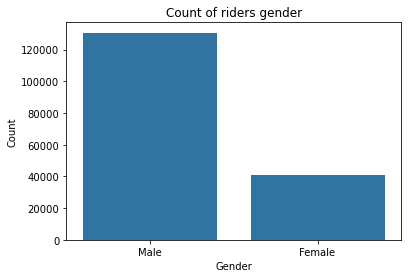

In [134]:
# let`s explore the distribution of member_gender varible using bar chart
order = data['member_gender'].value_counts().index
sb.countplot(data = data , x = 'member_gender' , color = base_color , order = order);
plt.xlabel('Gender');
plt.ylabel('Count');
plt.title('Count of riders gender');

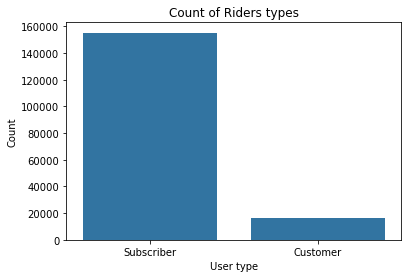

In [135]:
# let`s explore the distribution of user_type varible using bar chart
order = data['user_type'].value_counts().index
sb.countplot(data = data , x = 'user_type' , color = base_color , order = order);
plt.xlabel('User type');
plt.ylabel('Count');
plt.title('Count of Riders types');

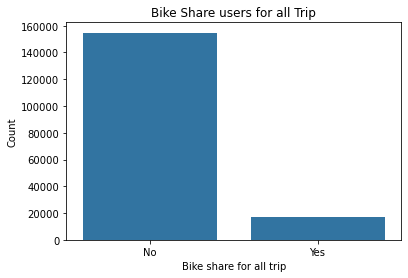

In [136]:
# let`s explore the distribution of bike_share_for_all_trip varible using bar chart
order = data['bike_share_for_all_trip'].value_counts().index
sb.countplot(data = data , x = 'bike_share_for_all_trip' , color = base_color , order = order);
plt.xlabel('Bike share for all trip');
plt.ylabel('Count');
plt.title('Bike Share users for all Trip');

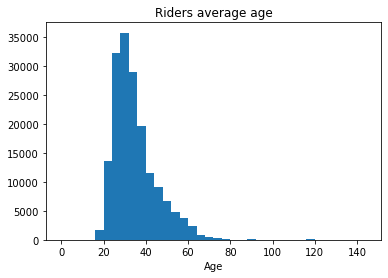

In [137]:
# let`s explore the distribution of age varible using histogram chart
bins = np.arange(0 , data['age'].max()+4 , 4)
plt.hist(data = data , x = 'age' , bins = bins ) ;
plt.xlabel('Age') ;
plt.title('Riders average age');

#### Let's Convert Y axis into log scale because it may lead to a better visualization 

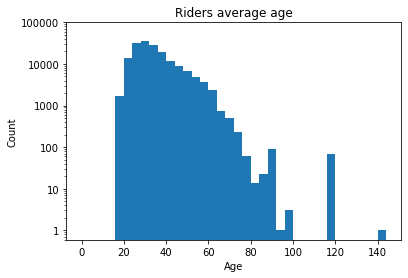

In [138]:
labels = [1,10,100,1000,10000,100000]
ticks = ['{}'.format(v) for v in labels]
bins = np.arange(0 , data['age'].max()+4 , 4)
plt.hist(data = data , x = 'age' , bins = bins ) ;
plt.yscale('log') ;
plt.yticks(labels , ticks) ;
plt.xlabel('Age') ;
plt.ylabel('Count') ;
plt.title('Riders average age');

In [139]:
data['age'].describe(percentiles = [.99])

count    171495.000000
mean         34.157672
std          10.113921
min          18.000000
50%          32.000000
99%          64.000000
max         141.000000
Name: age, dtype: float64

In [140]:
data = data.query('age < 64')

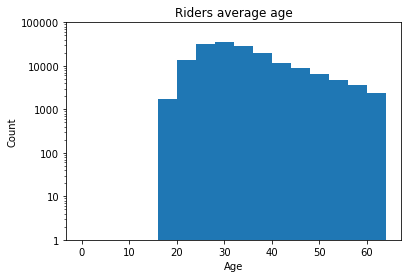

In [141]:
labels = [1,10,100,1000,10000,100000]
ticks = ['{}'.format(v) for v in labels]
bins = np.arange(0 , data['age'].max()+4 , 4)
plt.hist(data = data , x = 'age' , bins = bins ) ;
plt.yscale('log') ;
plt.yticks(labels , ticks) ;
plt.xlabel('Age') ;
plt.ylabel('Count') ;
plt.title('Riders average age');

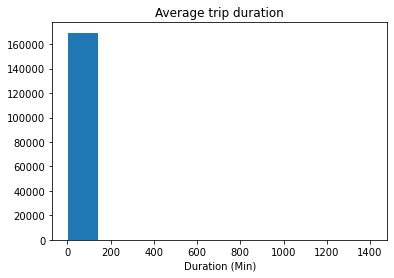

In [142]:
# let`s explore the distribution of Duration varible using histogram chart
plt.hist(data = data , x = 'duration_min'  ) ;
plt.xlabel('Duration (Min)') ;
plt.title('Average trip duration') ;

In [143]:
data['duration_min'].describe(percentiles=[.99])

count    169731.000000
mean         11.631619
std          26.363791
min           1.016667
50%           8.500000
99%          51.845000
max        1409.133333
Name: duration_min, dtype: float64

In [144]:
data = data.query('duration_min < 52')

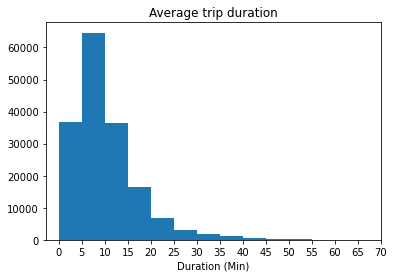

In [145]:
bins = np.arange(0 , data['duration_min'].max()+5 , 5)
labels = [0 ,5,10,15,20,25,30,35,40,45,50,55,60,65,70]
ticks = ['{}'.format(v) for v in labels]
plt.hist(data = data , x = 'duration_min'  , bins = bins) ;
plt.xlabel('Duration (Min)') ;
plt.xticks(labels,ticks) ;
plt.title('Average trip duration') ;

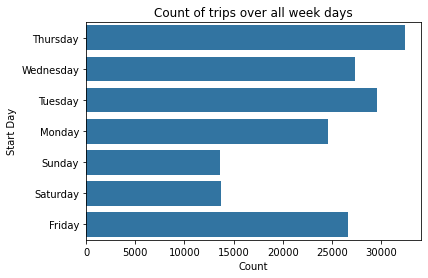

In [146]:
# let`s explore the distribution of start_day varible using bar chart
sb.countplot(data = data , y = 'start_day' , color = base_color );
plt.xlabel('Count');
plt.ylabel('Start Day');
plt.title('Count of trips over all week days');

### Discuss the distribution(s) of your variable(s) of interest. Were there any unusual points? Did you need to perform any transformations?

Saturday and sunday were had the least numbers of trips,Also the number of the male riders is more than than female, most members were subscribers and the majority of the members did not use bike share for all of their trips

Most rides were between 5 to 10 minutes, though there were some very long outliers like 24hrs but i handleded it 

While exploring the age distribution i saw that it would be better if i transformed the y axis into "log" Scale
### Of the features you investigated, were there any unusual distributions? Did you perform any operations on the data to tidy, adjust, or change the form of the data? If so, why did you do this?

While exploring Age and Duration_min it appeared that there was outliers that needed to be removed to keep focus on data

## Bivariate Exploration

> In this section, investigate relationships between pairs of variables in your
data. Make sure the variables that you cover here have been introduced in some
fashion in the previous section (univariate exploration).

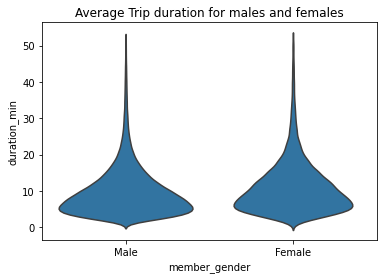

In [147]:
#let's explore the distribution of the trip duration for men compared to women using the violin plot
sb.violinplot(data = data , x = 'member_gender' , y = 'duration_min' , color = base_color , inner= None) ;
plt.title('Average Trip duration for males and females');

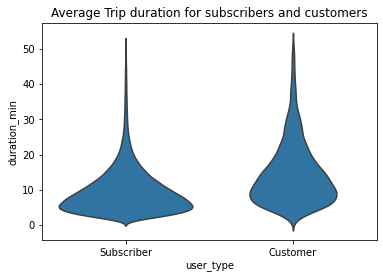

In [148]:
#let's explore the distribution of the trip duration for subscribers compared to customer using the violin plot
sb.violinplot(data = data , x = 'user_type' , y = 'duration_min' , color = base_color , inner= None) ;
plt.title('Average Trip duration for subscribers and customers');

Text(0.5, 1.0, 'Distribution of avg trip duration over week days')

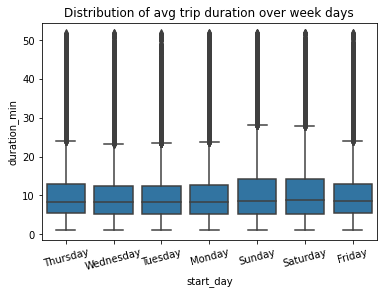

In [149]:
#let's explore the distribution of the trip duration forover the week days using the box plot
sb.boxplot(data = data , x = 'start_day' , y = 'duration_min' , color = base_color ) ;
plt.xticks(rotation = 15) ;
plt.title('Distribution of avg trip duration over week days')

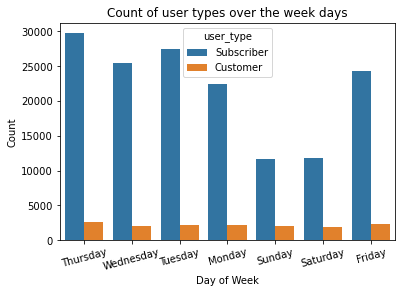

In [150]:
#let's explore the difference of the distribution between user types over the week days using the Clustered plot
sb.countplot(data= data , x='start_day', hue='user_type');
plt.xlabel('Day of Week');
plt.ylabel('Count');
plt.xticks(rotation = 15) ;
plt.title('Count of user types over the week days');

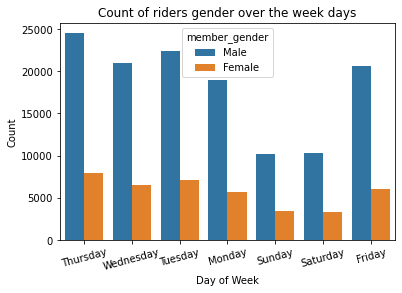

In [151]:
#let's explore the difference of the distribution between men and women over the week days using the Clustered plot
sb.countplot(data= data , x='start_day', hue='member_gender');
plt.xlabel('Day of Week');
plt.ylabel('Count');
plt.xticks(rotation = 15) ;
plt.title('Count of riders gender over the week days');

### Talk about some of the relationships you observed in this part of the investigation. How did the feature(s) of interest vary with other features in the dataset?

It looks from the distribution of the trip duration for subscribers compared to customers that the customers tend to spend more time in their trip than the subscribers, Also subscribers makes more trips over all the week days than the customers.and so on the number of males is higher than females over all the week days

### Did you observe any interesting relationships between the other features (not the main feature(s) of interest)?

No

## Multivariate Exploration


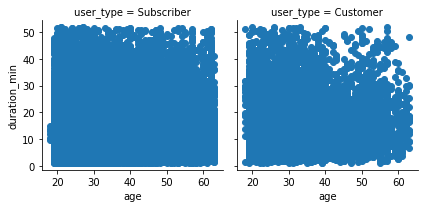

In [152]:
#How does the age affects on the average trip duration between customers and subscribers?
g = sb.FacetGrid(data = data , col = 'user_type');
g.map(plt.scatter , 'age' , 'duration_min');
#plt.title('Average trip duration for user types over the different ages');

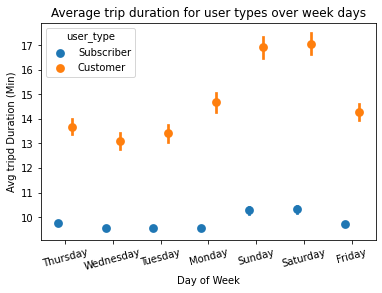

In [153]:
#How does the user_type affects on the average trip duration over all the week days ?
sb.pointplot(data=data, x='start_day', y='duration_min', hue='user_type', dodge=0.3, linestyles="");
plt.xlabel('Day of Week');
plt.ylabel('Avg tripd Duration (Min)');
plt.xticks(rotation = 15 )
plt.title('Average trip duration for user types over week days');

### Talk about some of the relationships you observed in this part of the investigation. Were there features that strengthened each other in terms of looking at your feature(s) of interest?

More subscribers at the age between 40 and 60 tend to spend more time than the customers at the same age, Also the average trip duration for the customers takes more time than the subscriber ride over the week days

### Were there any interesting or surprising interactions between features?

It wasn't surprising that the subscribers are used to riding bikes and so at the age between 40-60 the customers get tired berfore the subscribers. but what really surprised me that the average trip duration for the customers takes more time than the subscriber ride over the week days